In [16]:
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf


In [2]:
df = pd.read_csv('Combined_Data_with_Voltages.csv', index_col=0)
df

,PTemp_C_Max,AirTC_Avg,RH,WS_ms_Avg,WindDir,TPM1,TPM2.5,TPM10,GeffRef,TempRef,Cycle,Rainfall,Daylight,FT_Voltage1,FT_Voltage2,DN_Voltage1,DN_Voltage2
DateTime,,,,,,,,,,,,,,,,,
2022-01-10 00:00:00,14.130,14.170,70.200,0.0810,252.700,42.0,62.0,70.0,0.000559,11.0750,3.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-01-10 00:01:00,14.116,14.150,70.322,0.0742,215.844,42.0,62.0,67.0,0.001397,11.0625,3.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-01-10 00:02:00,14.102,14.130,70.444,0.0674,178.988,44.0,61.0,64.0,0.002235,11.0500,3.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-01-10 00:03:00,14.088,14.110,70.566,0.0606,142.132,45.0,64.0,68.0,0.006148,11.0250,3.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-01-10 00:04:00,14.074,14.090,70.688,0.0538,105.276,44.0,63.0,67.0,0.000559,10.9900,3.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-19 23:55:00,31.690,29.340,41.480,0.7820,156.400,37.0,55.0,61.0,0.036891,27.9250,7.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-04-19 23:56:00,31.646,29.482,41.006,0.6770,149.340,37.0,55.0,61.0,0.001537,27.9550,7.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-04-19 23:57:00,31.602,29.624,40.532,0.5720,142.280,33.0,49.0,53.0,0.085030,27.9800,7.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
col = 'FT_Voltage1'

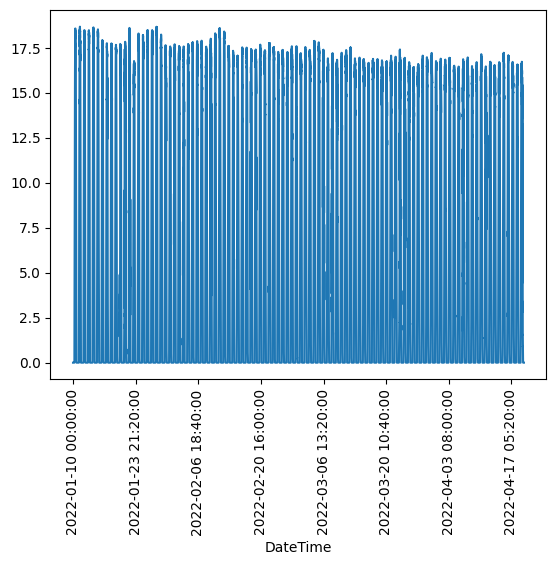

In [12]:
df[col].plot()
plt.xticks(rotation=90)
plt.show()

In [15]:
df_stationarityTest = adfuller(df[col], autolag='AIC')
print("P-value: ", df_stationarityTest[1])

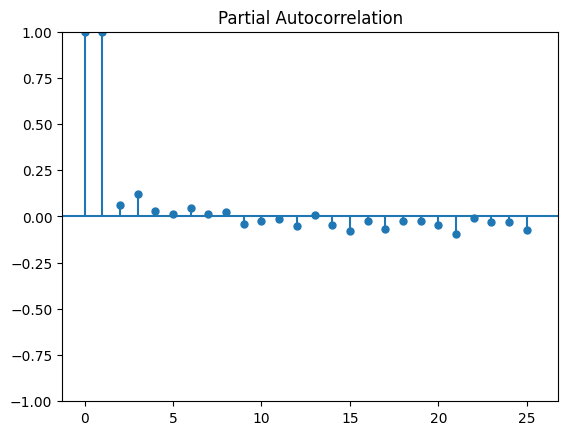

In [19]:
pacf = plot_pacf(df[col], lags=25)

In [20]:
# Create test and train data
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
# Keep the col column only
train = train[col]
test = test[col]

In [22]:
ar_model = AutoReg(train, lags=8).fit()

/home/mirlab/anaconda3/envs/gnn/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)


In [23]:
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:            FT_Voltage1   No. Observations:               115200
Model:                     AutoReg(8)   Log Likelihood              -13852.431
Method:               Conditional MLE   S.D. of innovations              0.273
Date:                Mon, 26 Jun 2023   AIC                          27724.862
Time:                        18:45:28   BIC                          27821.405
Sample:                    01-10-2022   HQIC                         27753.976
                         - 03-30-2022                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0029      0.001      2.871      0.004       0.001       0.005
FT_Voltage1.L1     0.9106      0.003    309.246      0.000       0.905       0.916
FT_Voltage1.L2    -0.0476      0.004

In [25]:
pred = ar_model.predict(start=len(train), end=(len(df)-1), dynamic=False)
from matplotlib import pyplot
pyplot.plot(pred)
pyplot.plot(test, color='red')

/home/mirlab/anaconda3/envs/gnn/lib/python3.9/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
